1.	Data Acquistion - OK
2.	Exploratory data analysis Analysis 
2.1.	Statistical data analysis - OK
2.2.	Investigating Outliers - OK
2.3.	Investigating Missing Values - OK
3.	Data Preprocessing
3.1.	Timeseries Missing Value Treatment - No missing values
3.2.	Timeseries Outliers handling - Couldn't make it
3.3.	Convert timestemps and dataset index - OK
4.	Most correlated columns Variables Selection - OK
5.	Data Transformation... - Not sure about this

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
from histograms import histograms


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn import datasets
from sklearn.datasets import make_classification

C:\ProgramData\Anaconda3\lib\site-packages\histograms\utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


In [4]:
ff_dataset = pd.read_csv("Apple_1990-1998.csv");
ff_dataset.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  02-01-1990  0.314732  0.334821  0.312500  0.332589   0.266423  183198400
1  03-01-1990  0.339286  0.339286  0.334821  0.334821   0.268211  207995200
2  04-01-1990  0.341518  0.345982  0.332589  0.335938   0.269106  221513600
3  05-01-1990  0.337054  0.341518  0.330357  0.337054   0.270000  123312000
4  08-01-1990  0.334821  0.339286  0.330357  0.339286   0.271788  101572800

In [5]:
ff_dataset.tail()

Date        Open        High         Low       Close   Adj Close  \
8037  23-11-2021  161.119995  161.800003  159.059998  161.410004  161.410004   
8038  24-11-2021  160.750000  162.139999  159.639999  161.940002  161.940002   
8039  26-11-2021  159.570007  160.449997  156.360001  156.809998  156.809998   
8040  29-11-2021  159.369995  161.190002  158.789993  160.240005  160.240005   
8041  30-11-2021  159.990005  165.520004  159.919998  165.300003  165.300003   

         Volume  
8037   96041900  
8038   69463600  
8039   76959800  
8040   88748200  
8041  174048100

In [6]:
ff_dataset.describe()

Open         High          Low        Close    Adj Close  \
count  8042.000000  8042.000000  8042.000000  8042.000000  8042.000000   
mean     16.351917    16.525066    16.178668    16.358983    15.594377   
std      29.698129    30.021799    29.380971    29.717860    29.448485   
min       0.114955     0.118304     0.113839     0.115513     0.099037   
25%       0.367266     0.375000     0.358929     0.367188     0.308923   
50%       2.111071     2.138393     2.058393     2.106428     1.805978   
75%      21.204196    21.363661    20.989554    21.170268    18.389792   
max     161.679993   165.699997   161.000000   165.300003   165.300003   

             Volume  
count  8.042000e+03  
mean   3.831832e+08  
std    3.633095e+08  
min    2.396800e+06  
25%    1.478439e+08  
50%    2.664242e+08  
75%    4.808804e+08  
max    7.421641e+09

In [7]:
ff_dataset['Volume'] = ff_dataset['Volume'].astype(float)

In [8]:
ff_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   float64
dtypes: float64(6), object(1)
memory usage: 439.9+ KB


In [9]:
ff_dataset.shape

(8042, 7)

In [13]:
ff_dataset.nunique()
ff_dataset['Date'].unique()

array(['02-01-1990', '03-01-1990', '04-01-1990', ..., '26-11-2021',
       '29-11-2021', '30-11-2021'], dtype=object)

Identifying NULL Values

In [14]:
ff_dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Values


In [15]:
duplicate = ff_dataset.duplicated()
print("Total duplicated: ", duplicate.sum())
ff_dataset[duplicate]

Total duplicated:  0


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

Correlation

In [16]:
correlation = ff_dataset.corr()

Text(0.5, 1.0, 'Seaborn heatmap - Correlation between all Variables')

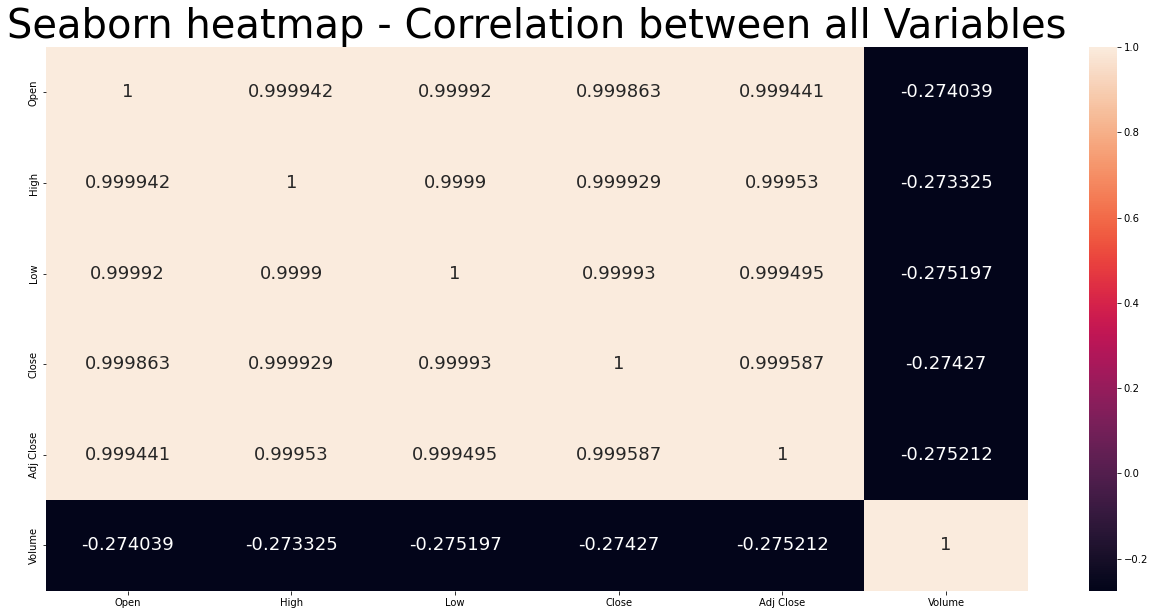

In [17]:
plt.figure(figsize=(22,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,annot_kws={"size": 18}, fmt='g')
plt.title('Seaborn heatmap - Correlation between all Variables', fontsize = 40)


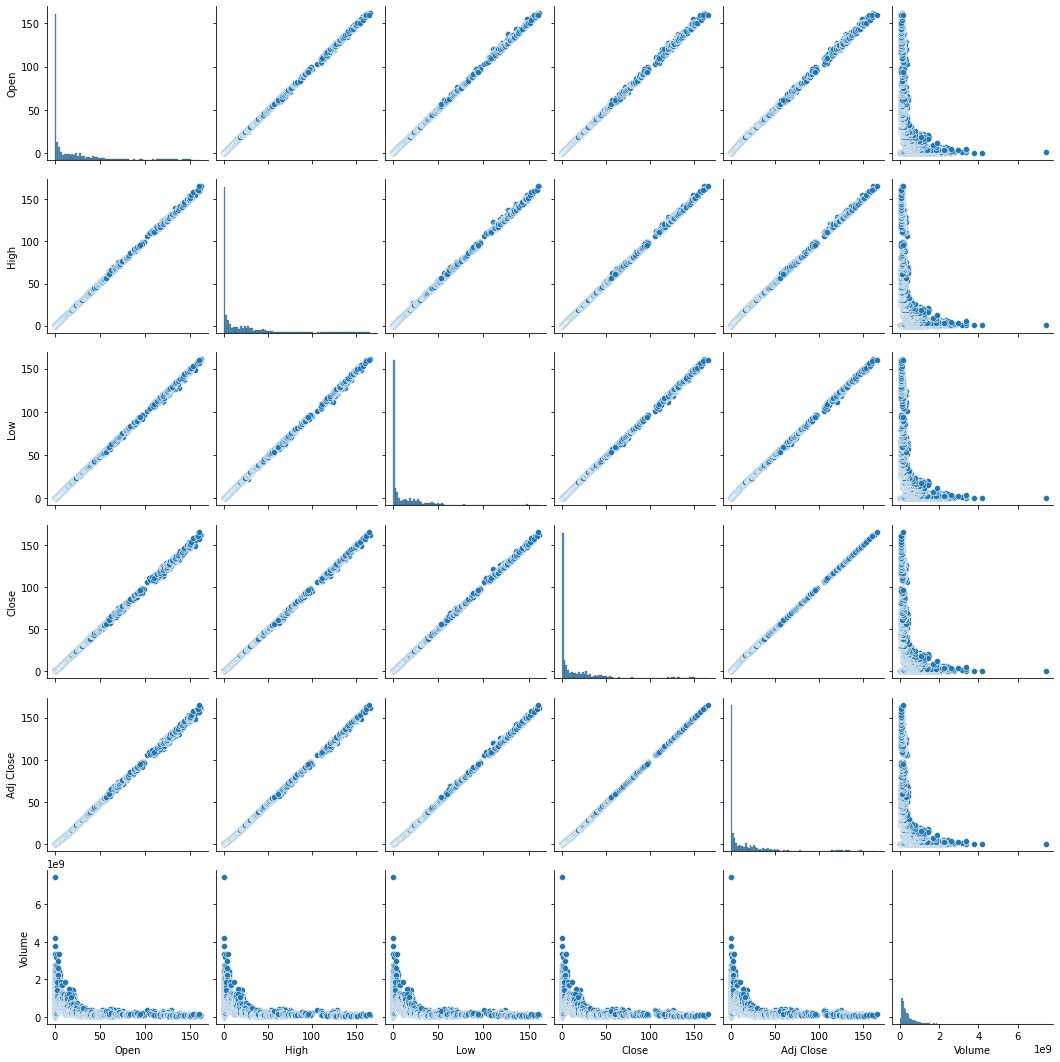

In [18]:
#Pair Grid
sns.pairplot(ff_dataset)

Some Graphs - using Full data set (ff_dataset)


In [19]:
columnnames =['Open', 'High', 'Low', 'Close', 'Adj Close']
#columnnames =list(ff_dataset.columns)

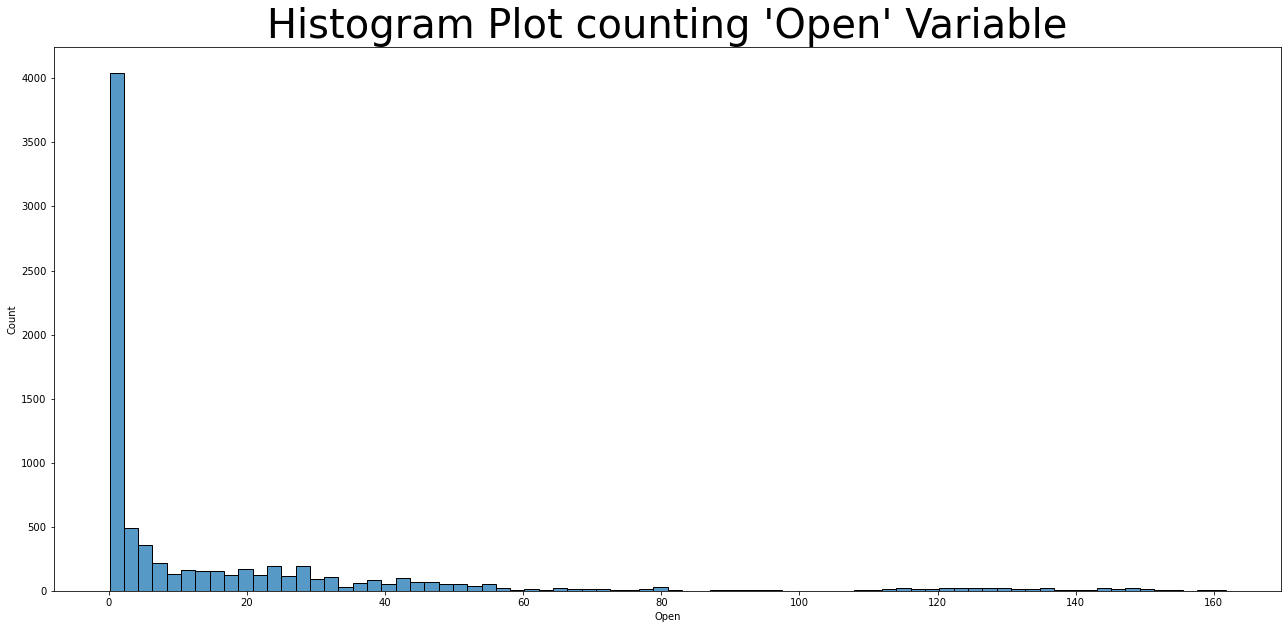

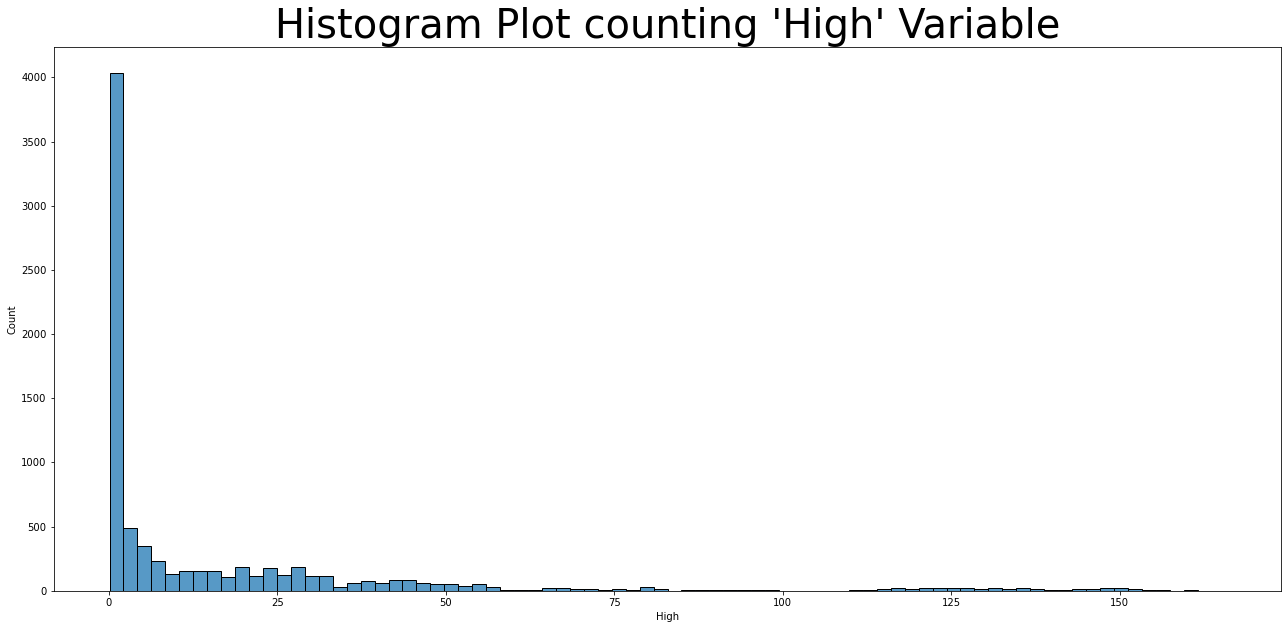

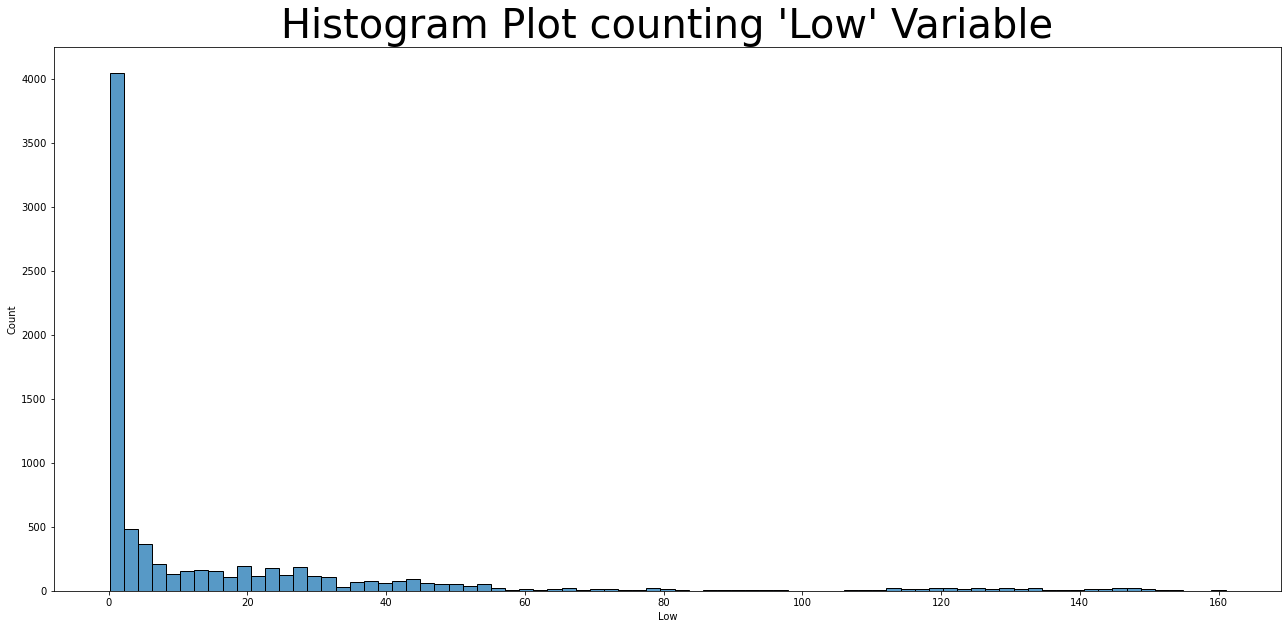

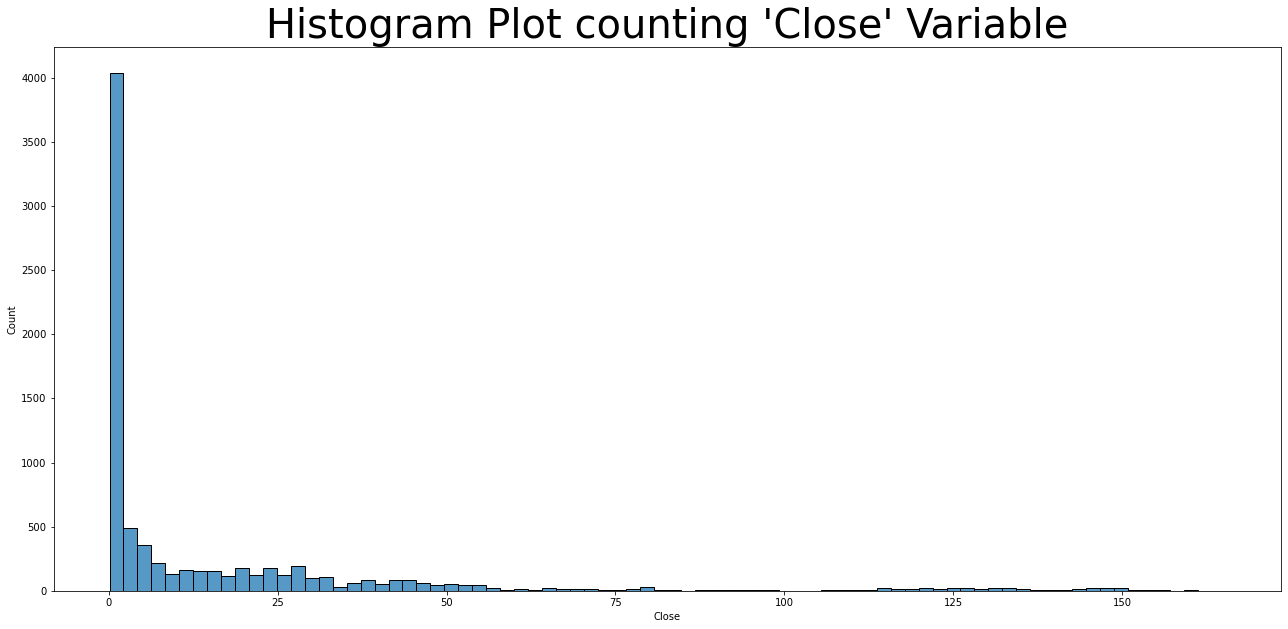

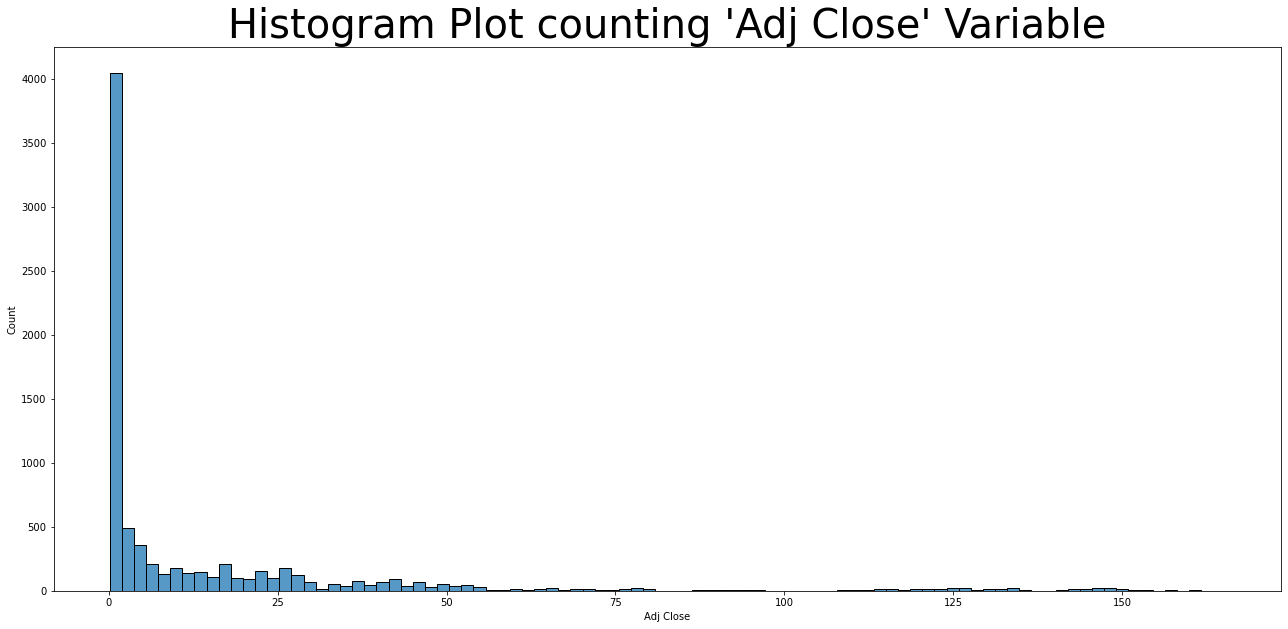

In [20]:
for columnname in columnnames:
    plt.figure(figsize=(22,10))
    sns.histplot(ff_dataset[columnname])
    plt.title("Histogram Plot counting '"+ columnname+ "' Variable", fontsize = 40)
    plt.show()

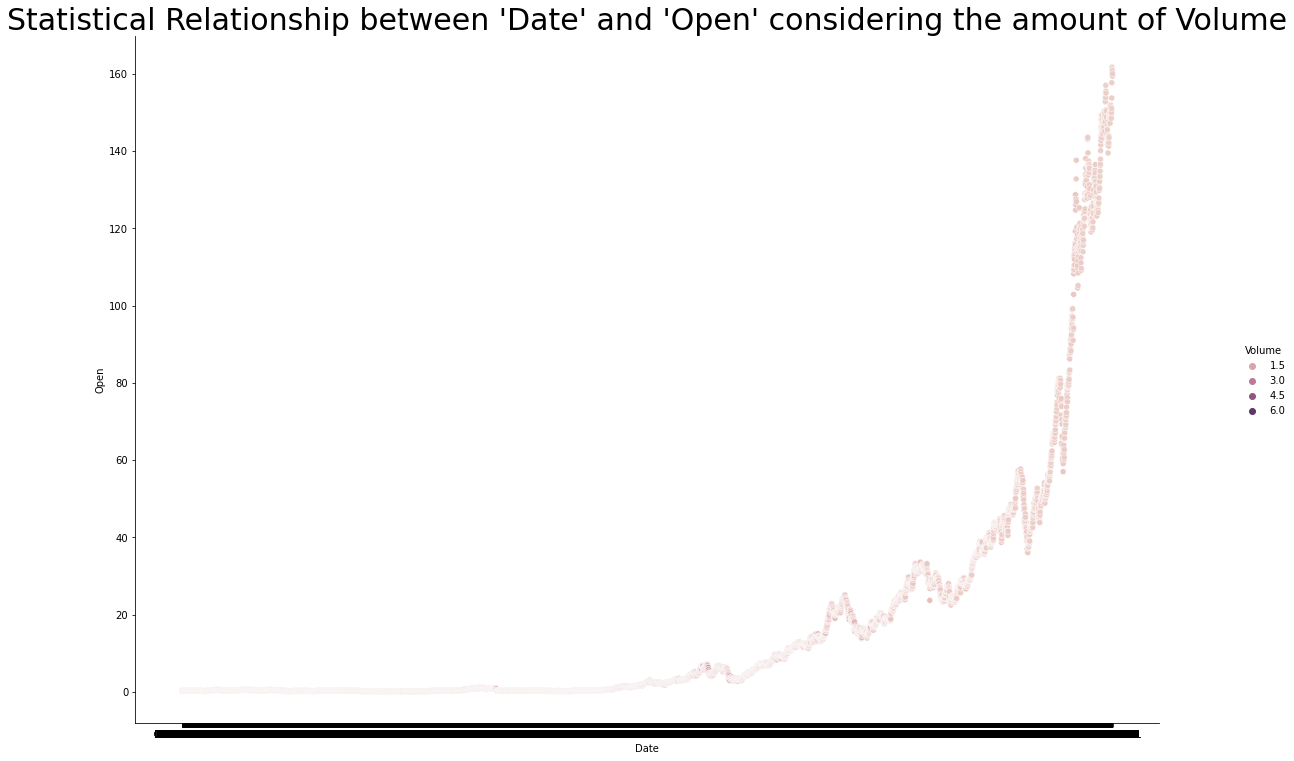

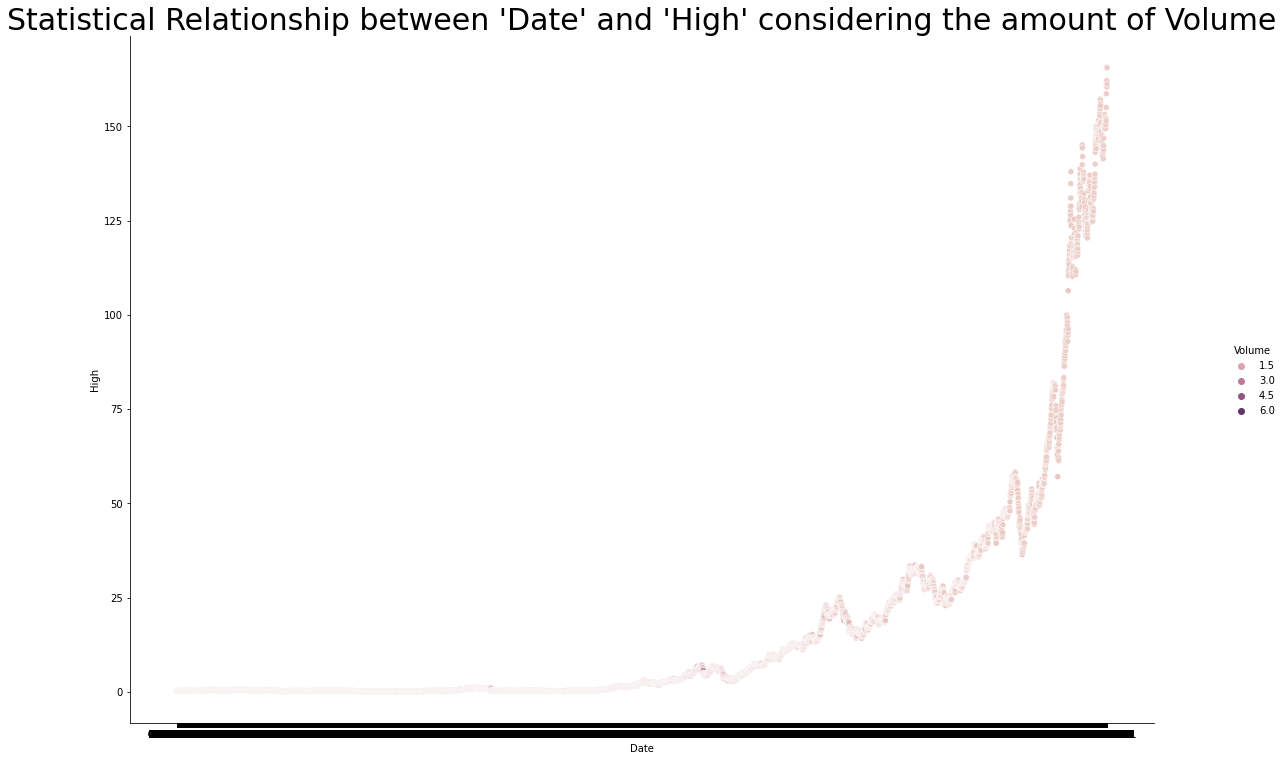

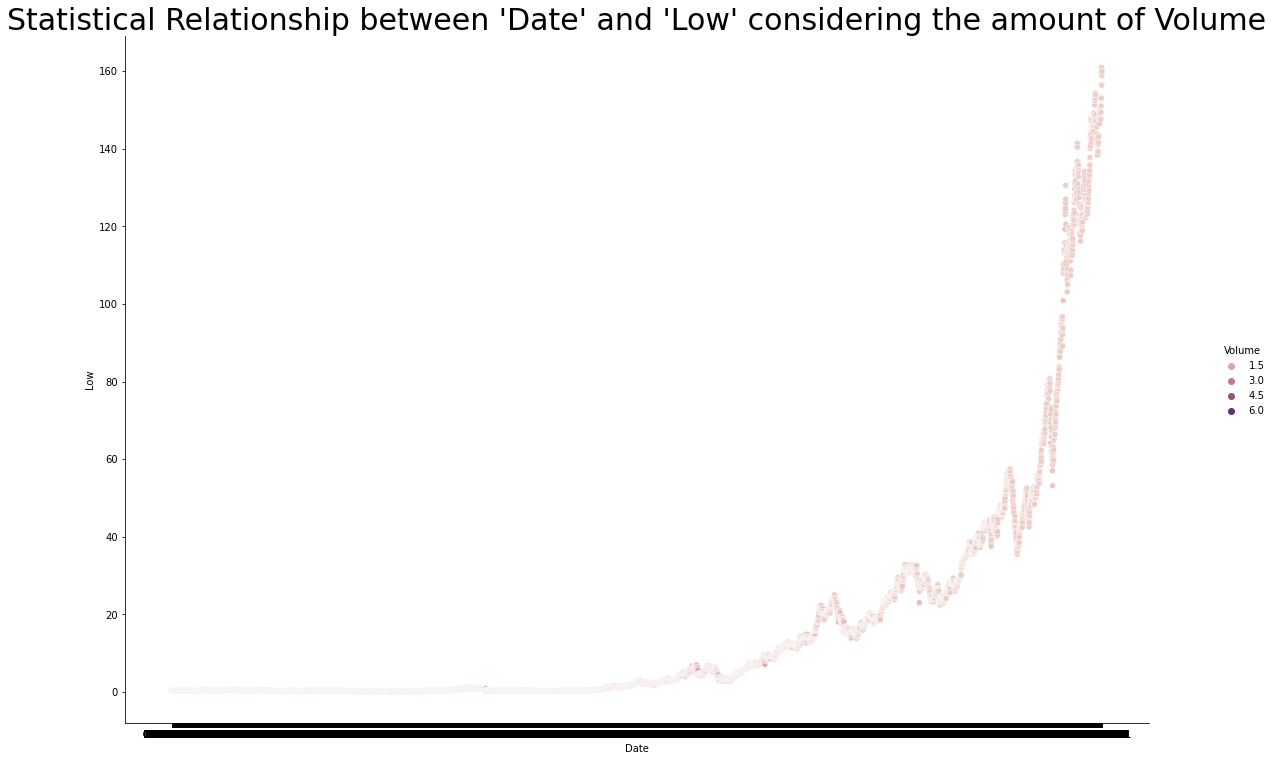

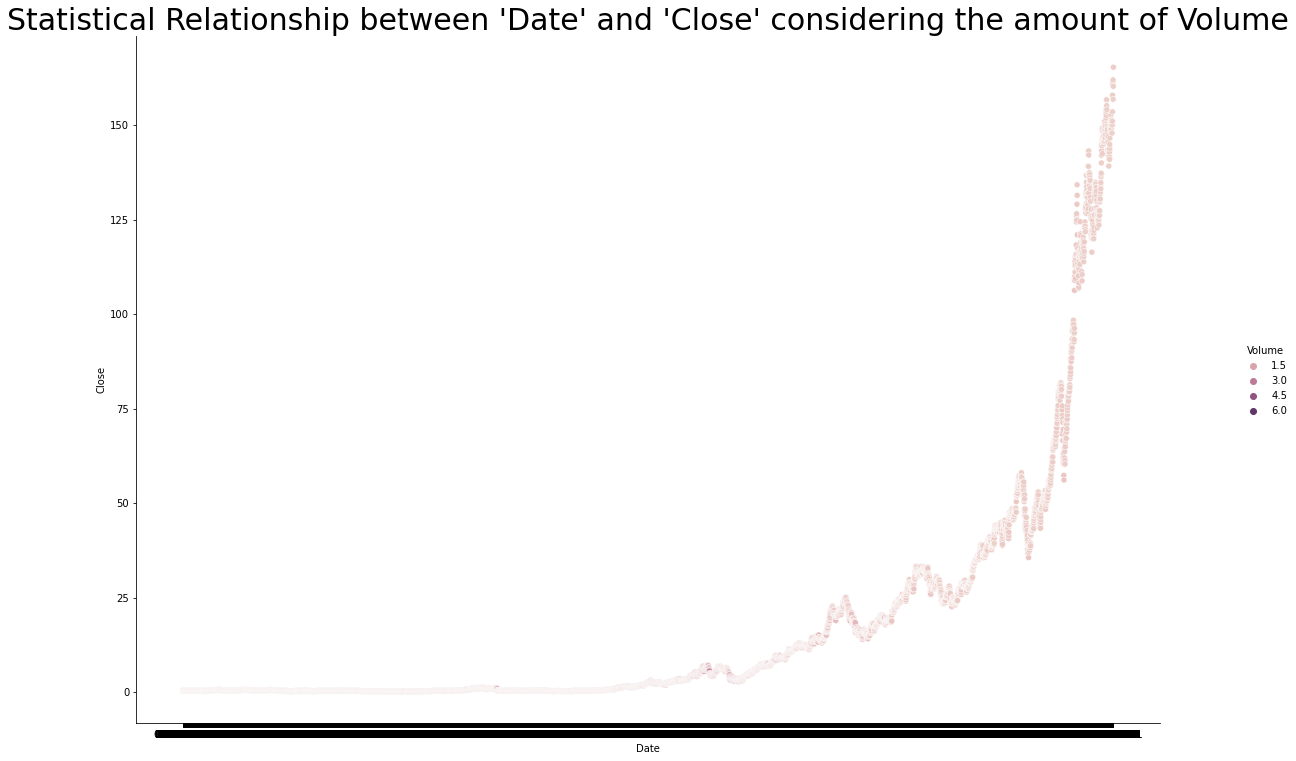

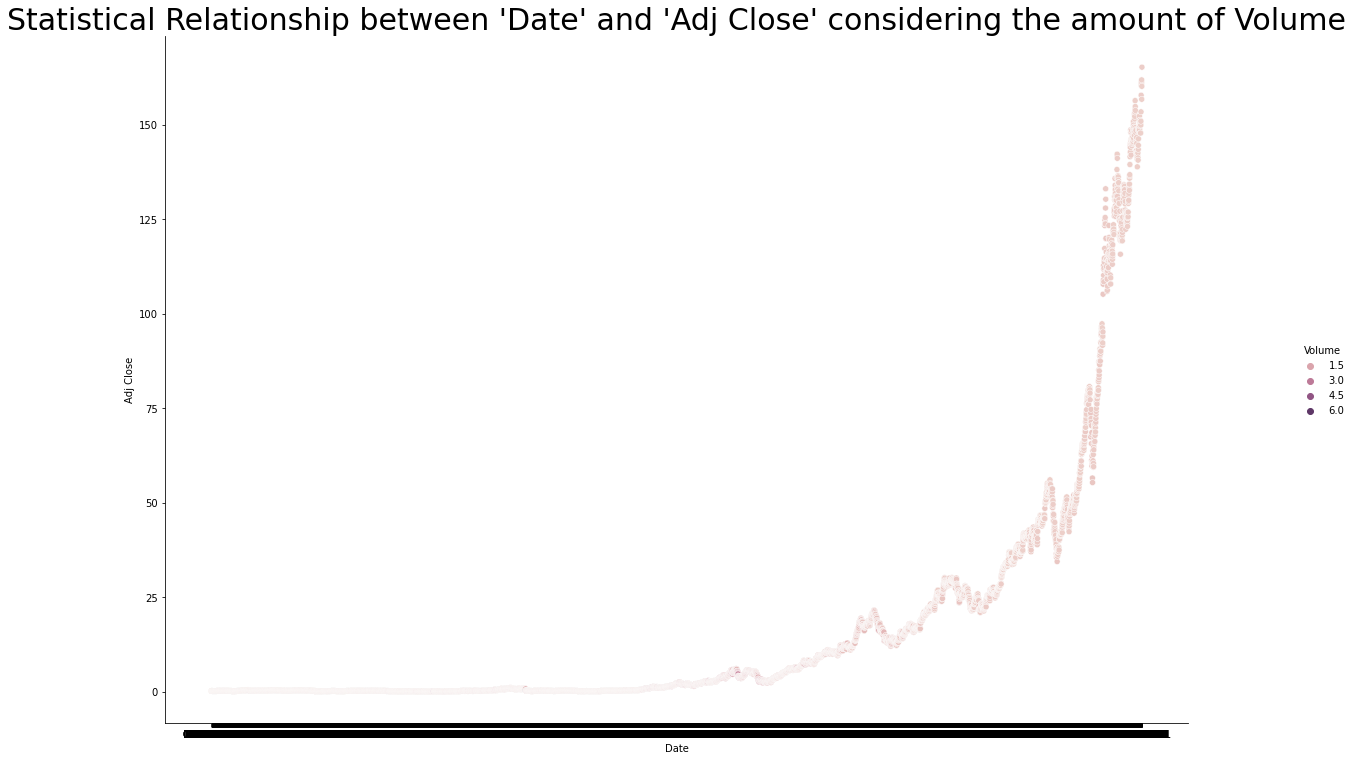

In [21]:
#plt.figure(figsize=(220,100))
for columnname in columnnames:
    sns.relplot(x='Date', y=columnname, hue='Volume', data=ff_dataset, height=10.27, aspect=10.7/7.27)
    plt.title("Statistical Relationship between 'Date' and '"+columnname+"' considering the amount of Volume", fontsize = 30)




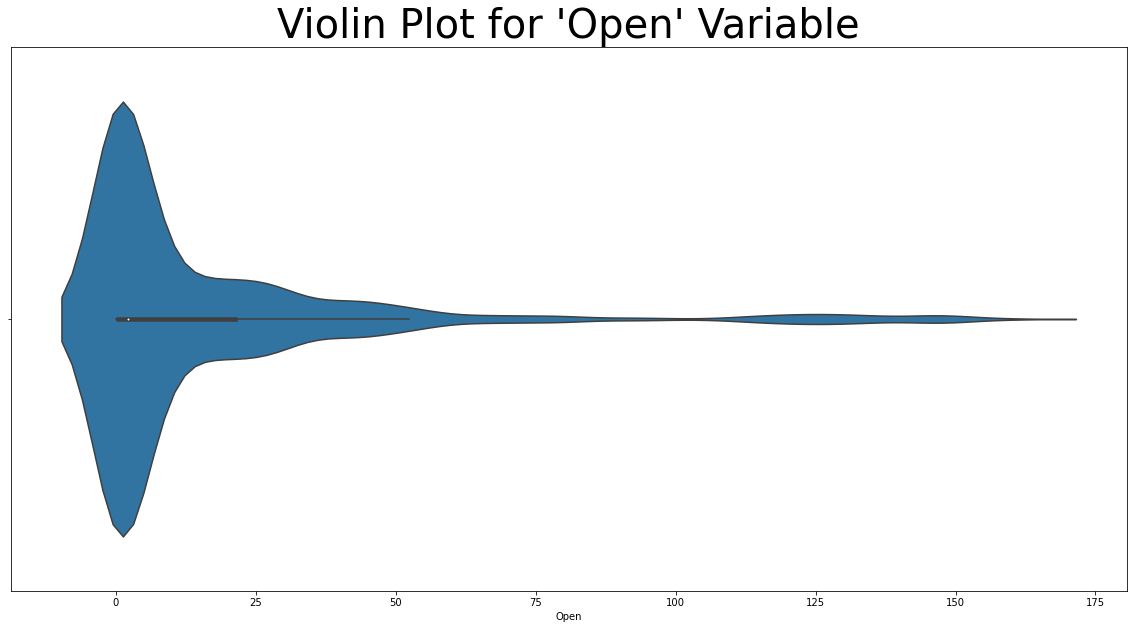

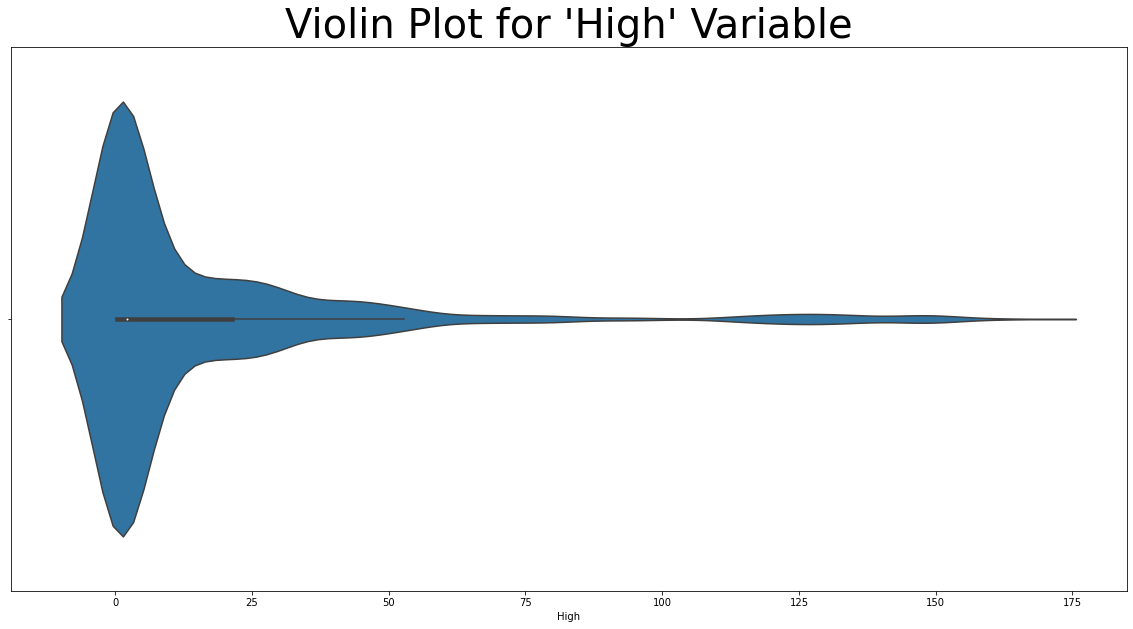

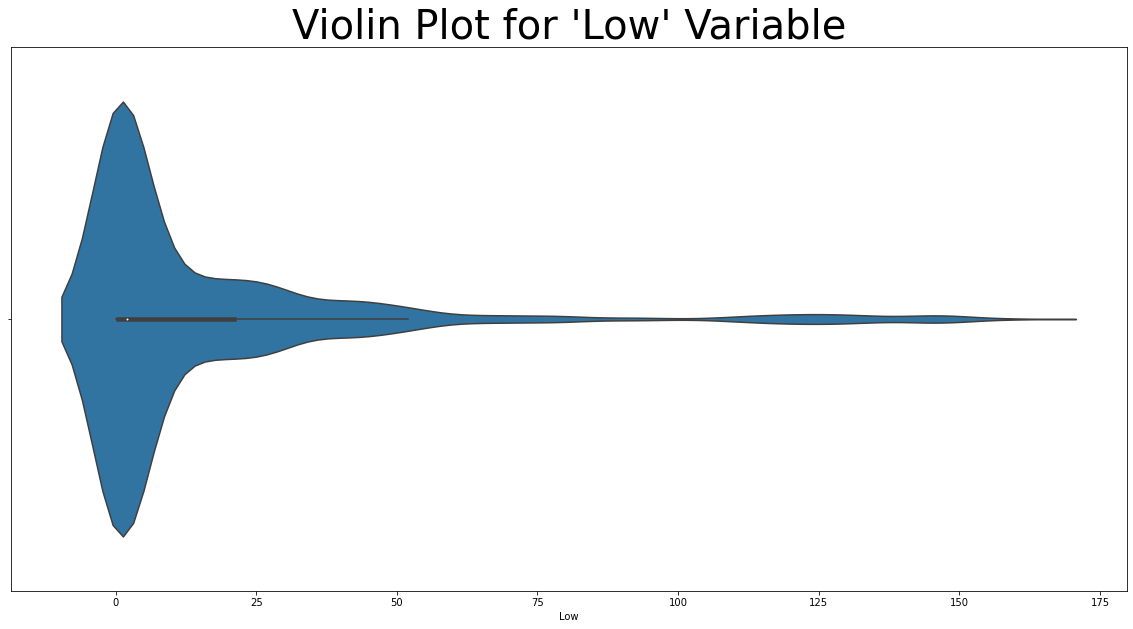

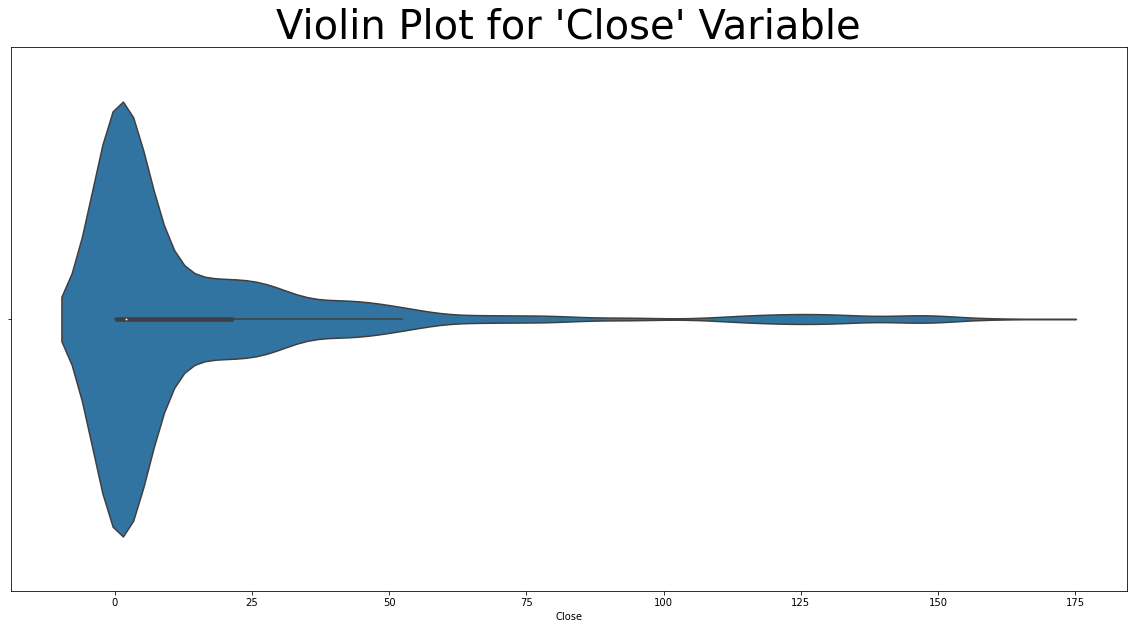

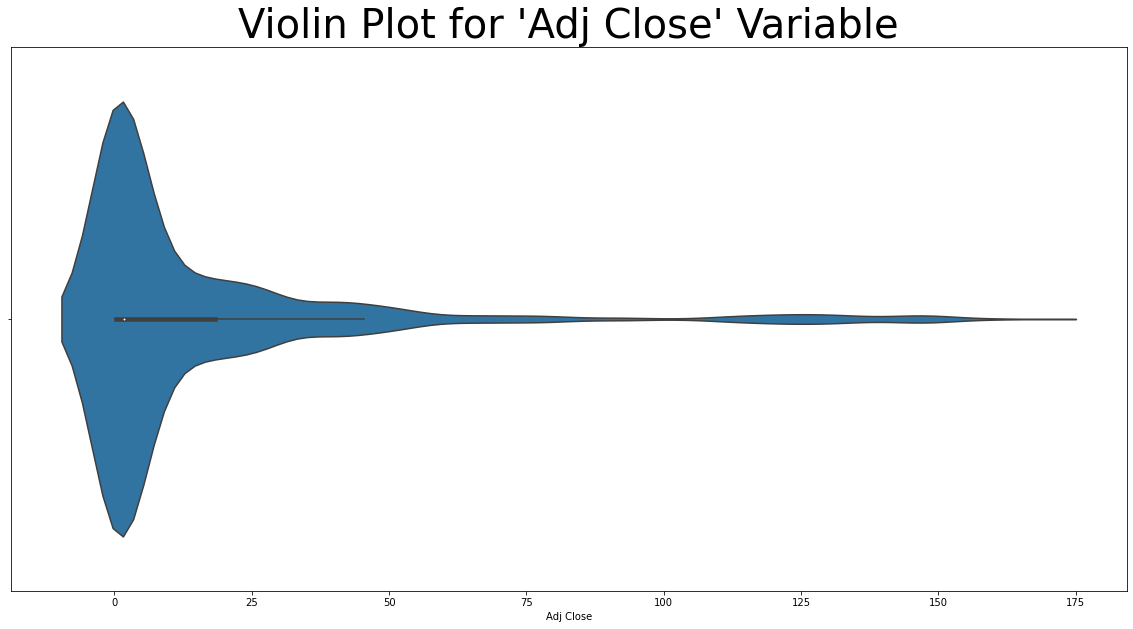

In [23]:
for columnname in columnnames:
  plt.figure(figsize=(20,10))
  sns.violinplot(x = columnname, data = ff_dataset)
  plt.title("Violin Plot for '"+ columnname+ "' Variable", fontsize = 40)
  plt.show()

In [24]:
volume = pd.DataFrame(ff_dataset.groupby("Volume").nunique().sort_values("Date", ascending=False).head())
#top_10

import plotly.express as px
segments = volume
fig = px.pie(segments, 
             values = volume["Volume"],
            names = volume.index,
            title = "Highest volume by Date",
            template = "seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [25]:
#Convert timestemps and dataset index
ff_dataset['Date'] = ff_dataset.index
ff_dataset.head()

Date      Open      High       Low     Close  Adj Close       Volume
0     0  0.314732  0.334821  0.312500  0.332589   0.266423  183198400.0
1     1  0.339286  0.339286  0.334821  0.334821   0.268211  207995200.0
2     2  0.341518  0.345982  0.332589  0.335938   0.269106  221513600.0
3     3  0.337054  0.341518  0.330357  0.337054   0.270000  123312000.0
4     4  0.334821  0.339286  0.330357  0.339286   0.271788  101572800.0

Identifying and removing outliers from dataset

In [10]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

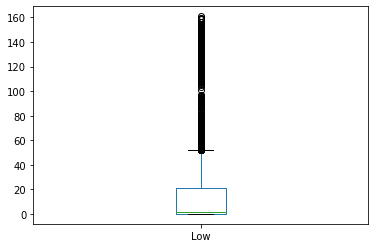

In [11]:
plot_boxplot(ff_dataset, "Low")

In [12]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
  return ls

In [13]:
index_list = []
for feature in ["Open", "High", "Low", "Close", "Adj Close","Volume"]:
  index_list.extend(outliers(ff_dataset, feature))

In [14]:
def remove(df, ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

In [15]:
df_cleaned = remove(ff_dataset, index_list)
df_cleaned.head()

Date      Open      High       Low     Close  Adj Close       Volume
0  02-01-1990  0.314732  0.334821  0.312500  0.332589   0.266423  183198400.0
1  03-01-1990  0.339286  0.339286  0.334821  0.334821   0.268211  207995200.0
2  04-01-1990  0.341518  0.345982  0.332589  0.335938   0.269106  221513600.0
3  05-01-1990  0.337054  0.341518  0.330357  0.337054   0.270000  123312000.0
4  08-01-1990  0.334821  0.339286  0.330357  0.339286   0.271788  101572800.0

In [16]:
#dropping data column to not being incompatible with some processes
df_cleaned.drop('Date', axis=1, inplace=True)

In [17]:
df_cleaned.shape

(6763, 6)

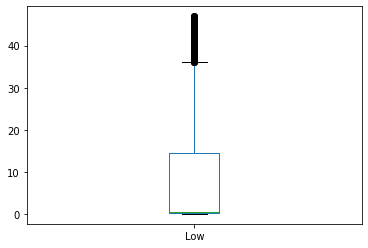

In [18]:
plot_boxplot(df_cleaned, 'Low')

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 7414
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6763 non-null   float64
 1   High       6763 non-null   float64
 2   Low        6763 non-null   float64
 3   Close      6763 non-null   float64
 4   Adj Close  6763 non-null   float64
 5   Volume     6763 non-null   float64
dtypes: float64(6)
memory usage: 369.9 KB


Text(0.5, 1.0, 'Scatterplot comparing incidences of High relating to the Volume from dataset without outliers')

<Figure size 576x288 with 0 Axes>

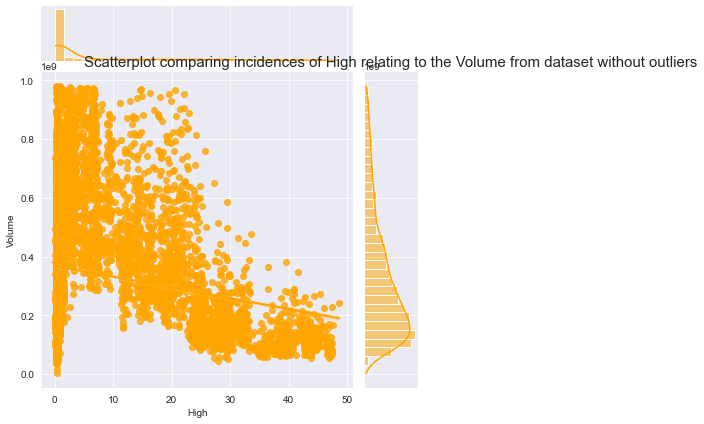

In [67]:
#Scatterplot comparing incidences of High against Low from dataset without outliers
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot (x='High', y='Volume', data=df_cleaned, kind='reg', color='orange')
plt.title('Scatterplot comparing incidences of High relating to the Volume from dataset without outliers', fontsize = 15)

Text(0.5, 1.0, 'Pair Grid for dataset (without outliers)')

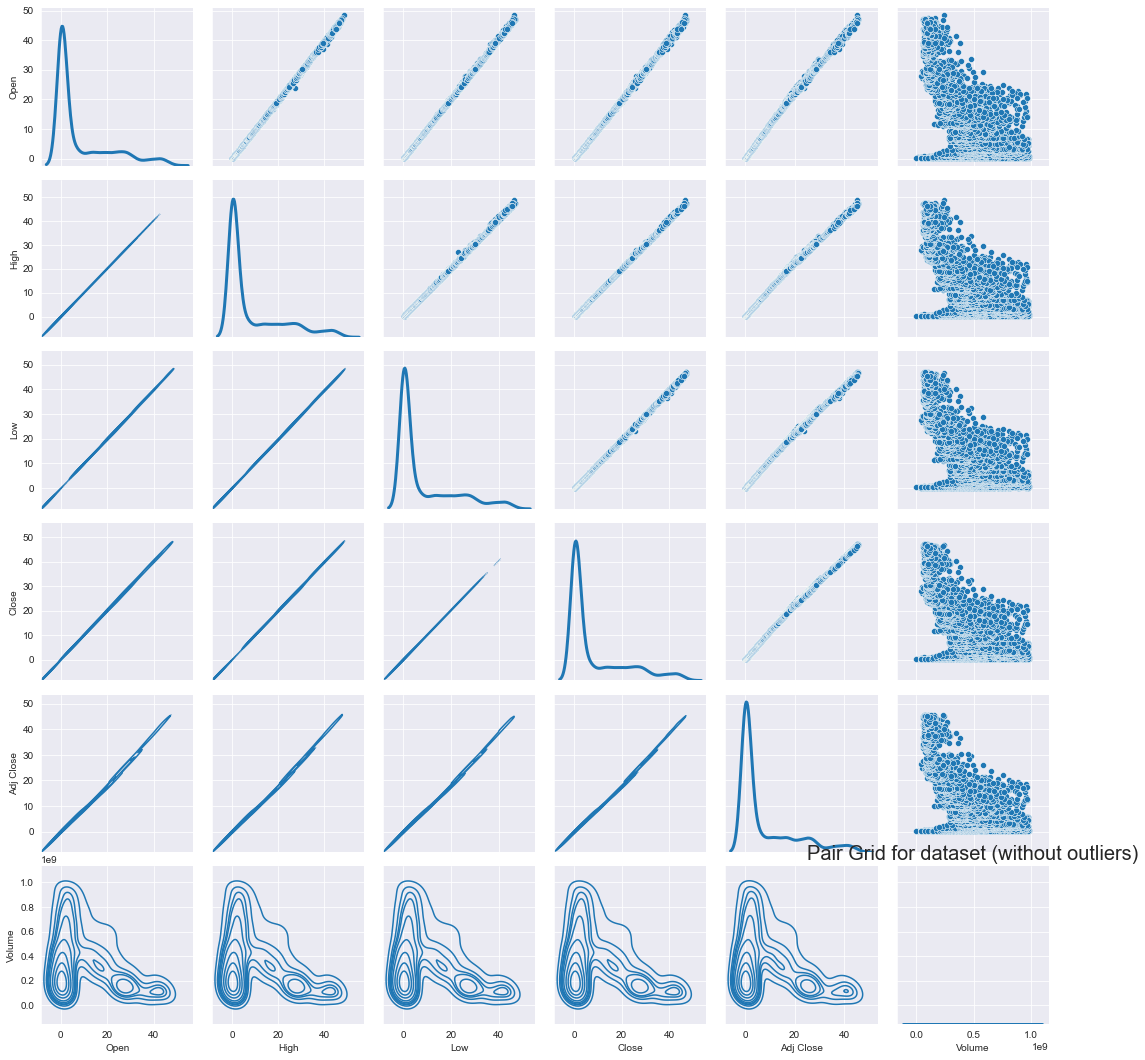

In [68]:
g = sns.PairGrid(df_cleaned)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.title("Pair Grid for dataset (without outliers)", fontsize = 20)

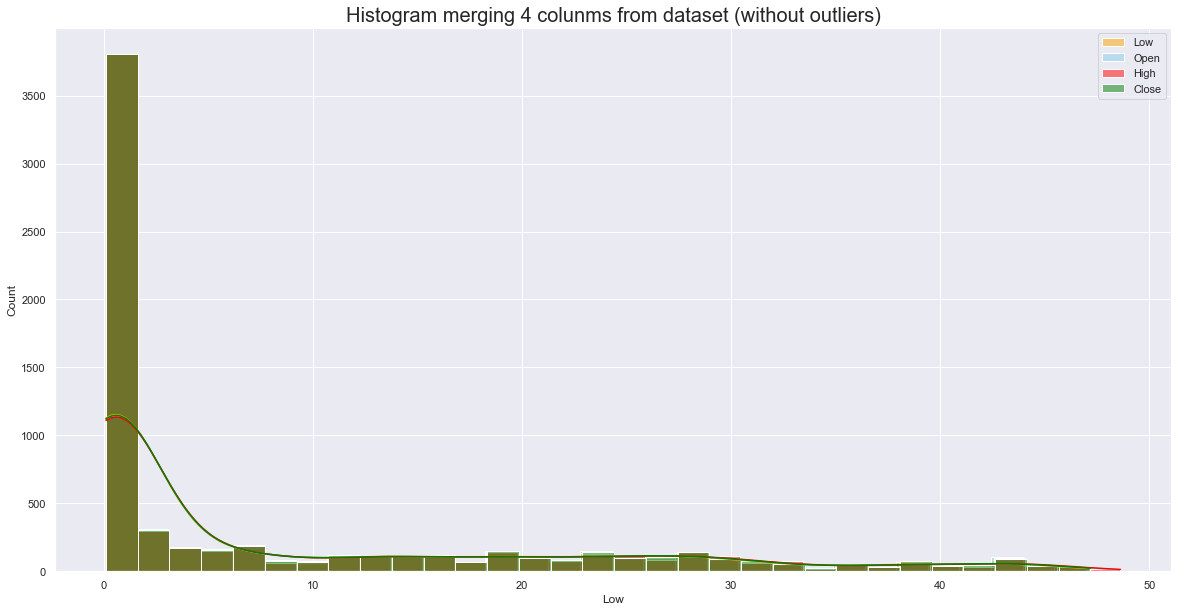

In [69]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.histplot(data=df_cleaned, x="Low", color="orange", label="Low", kde=True)
sns.histplot(data=df_cleaned, x="Open", color="skyblue", label="Open", kde=True)
sns.histplot(data=df_cleaned, x="High", color="red", label="High", kde=True)
sns.histplot(data=df_cleaned, x="Close", color="green", label="Close", kde=True)
plt.title("Histogram merging 4 colunms from dataset (without outliers)", fontsize = 20)
plt.legend() 
plt.show()

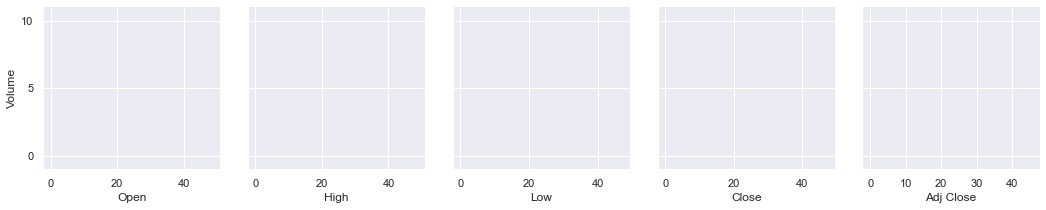

In [70]:
g = sns.PairGrid(df_cleaned, y_vars=["Volume"], x_vars=["Open", "High", "Low", "Close", "Adj Close"], height=3)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

In [71]:
df_cleaned.head

<bound method NDFrame.head of            Open       High        Low      Close  Adj Close       Volume
0      0.314732   0.334821   0.312500   0.332589   0.266423  183198400.0
1      0.339286   0.339286   0.334821   0.334821   0.268211  207995200.0
2      0.341518   0.345982   0.332589   0.335938   0.269106  221513600.0
3      0.337054   0.341518   0.330357   0.337054   0.270000  123312000.0
4      0.334821   0.339286   0.330357   0.339286   0.271788  101572800.0
...         ...        ...        ...        ...        ...          ...
7410  44.057499  44.497501  43.747501  43.767502  42.835052  108174400.0
7411  43.900002  44.480000  42.567501  43.325001  42.401974  161584400.0
7412  43.860001  44.957500  43.630001  44.910000  43.953209  123872000.0
7413  46.070000  46.247501  45.285000  45.634998  44.662766  119093600.0
7414  45.770000  46.367500  45.537498  46.305000  45.318493   90105200.0

[6763 rows x 6 columns]>

Finished outliers process

Data Normalization


[[1.71798444e-09 1.82764151e-09 1.70580092e-09 1.81545800e-09
  1.45428672e-09 1.00000000e+00]
 [1.63122034e-09 1.63122034e-09 1.60975349e-09 1.60975349e-09
  1.28950572e-09 1.00000000e+00]
 [1.54174732e-09 1.56189959e-09 1.50143829e-09 1.51655700e-09
  1.21485092e-09 1.00000000e+00]
 ...
 [3.54075182e-07 3.62935127e-07 3.52218427e-07 3.62551666e-07
  3.54827637e-07 1.00000000e+00]
 [3.86838587e-07 3.88329020e-07 3.80247133e-07 3.83185981e-07
  3.75022386e-07 1.00000000e+00]
 [5.07961805e-07 5.14592942e-07 5.05381465e-07 5.13899309e-07
  5.02950917e-07 1.00000000e+00]]
6763


KeyboardInterrupt: 

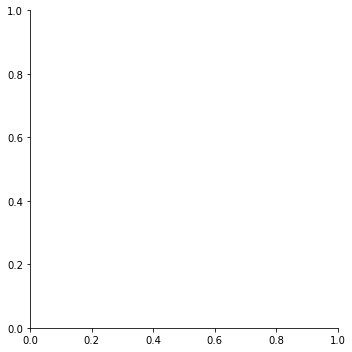

In [27]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

Norm = scaler.fit_transform(df_cleaned)

print(Norm)
print(len(Norm))
#sns.histplot(data=Norm, color="orange", label="Low", kde=True)
sns.displot(Norm)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

Min Max Scaler

[[0.00413103 0.00446411 0.00424026 0.00461182 0.00368787 0.18491833]
 [0.00463877 0.00455617 0.00471668 0.00465924 0.00372726 0.21027973]
 [0.00468492 0.00469423 0.00466904 0.00468297 0.00374698 0.22410594]
 ...
 [0.90457004 0.9244872  0.92881715 0.95166718 0.96619997 0.12424111]
 [0.9502689  0.95108422 0.96414176 0.9670699  0.981833   0.1193539 ]
 [0.94406543 0.95355834 0.96953113 0.98130422 0.99628005 0.08970546]]
6763


Text(0.5, 1.0, 'Min Max Scaler for dataset (without outliers)')

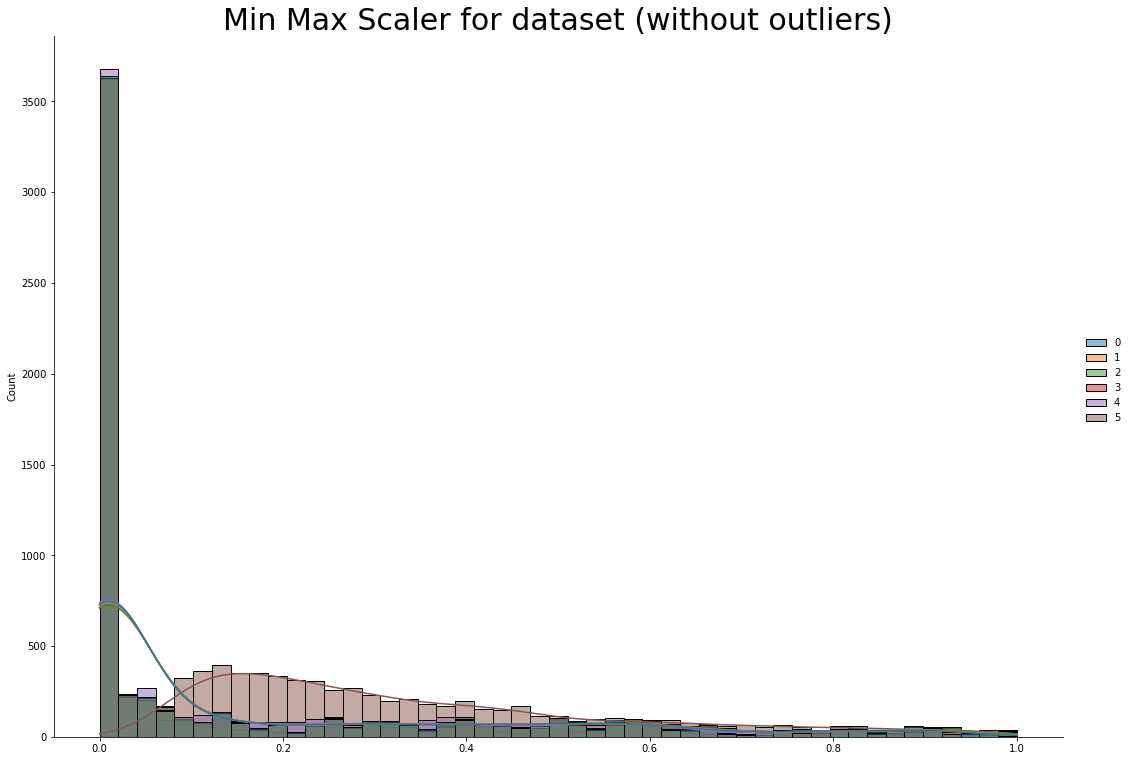

In [25]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
MMscaled = scaler.fit_transform(df_cleaned)
print(MMscaled)
print(len(MMscaled))

sns.displot(MMscaled, kde=True, height=10.27, aspect=10.7/7.27)
plt.title("Min Max Scaler for dataset (without outliers)", fontsize = 30)

Data standardization

[[-0.66024444 -0.6594487  -0.65958479 -0.65883955 -0.64345676 -0.69810282]
 [-0.6582756  -0.65909361 -0.65777935 -0.65866058 -0.64330377 -0.58542349]
 [-0.65809663 -0.65856111 -0.65795989 -0.65857101 -0.64322719 -0.52399442]
 ...
 [ 2.83140558  2.88921397  2.84417183  2.91572711  3.0944478  -0.96768837]
 [ 3.00861296  2.99180258  2.97803721  2.97386314  3.15515852 -0.98940194]
 [ 2.98455765  3.00134562  2.99846063  3.02758916  3.21126347 -1.12112835]]


Text(0.5, 1.0, 'Data standardization for dataset (without outliers)')

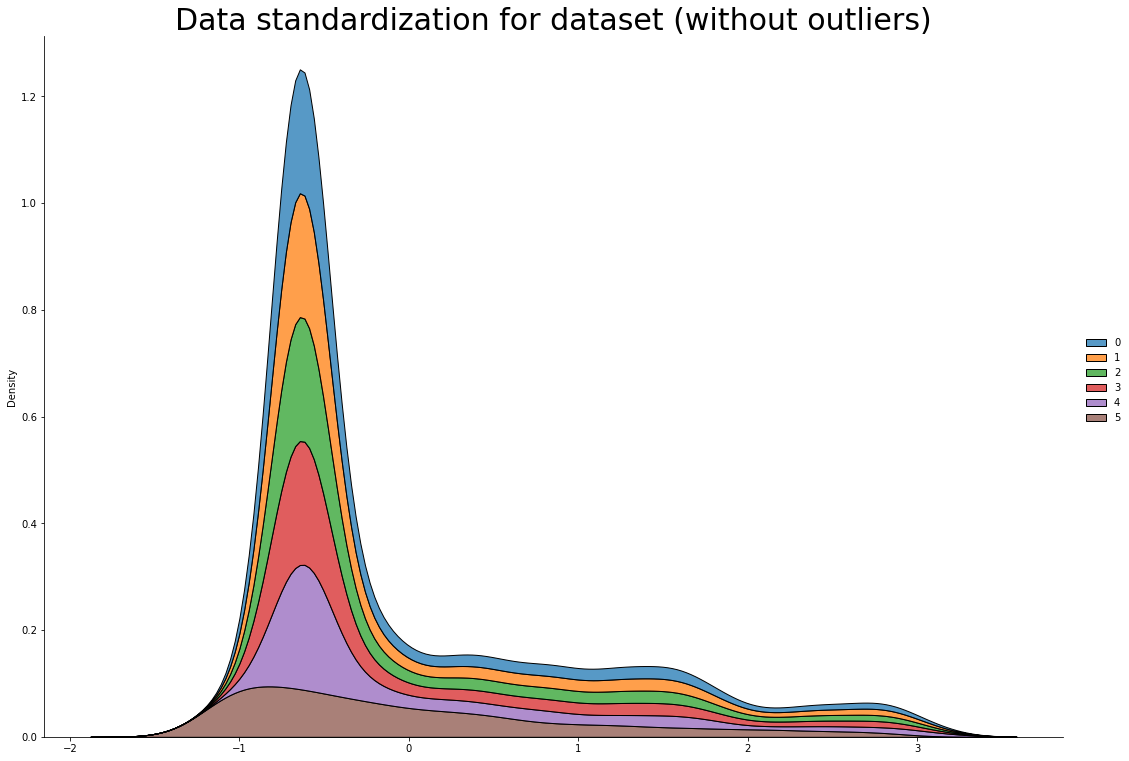

In [28]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
Sscaled = scaler.fit_transform(df_cleaned)
print(Sscaled)
sns.displot(Sscaled, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Data standardization for dataset (without outliers)", fontsize = 30)


Robust Scaler

[[-0.0229129  -0.0219107  -0.02251398 -0.02183992 -0.02308279 -0.31466661]
 [-0.02122132 -0.02160651 -0.02095595 -0.02168613 -0.02294052 -0.22874108]
 [-0.02106755 -0.02115032 -0.02111175 -0.02160916 -0.02286931 -0.18189731]
 ...
 [ 2.97703174  3.01816952  3.00109371  3.04968879  3.45301685 -0.52024362]
 [ 3.12928421  3.10605547  3.11661441  3.09964351  3.50947536 -0.53680166]
 [ 3.10861644  3.11423083  3.13423903  3.14580883  3.56165068 -0.63725186]]


Text(0.5, 1.0, 'Robust Scaler for dataset (without outliers)')

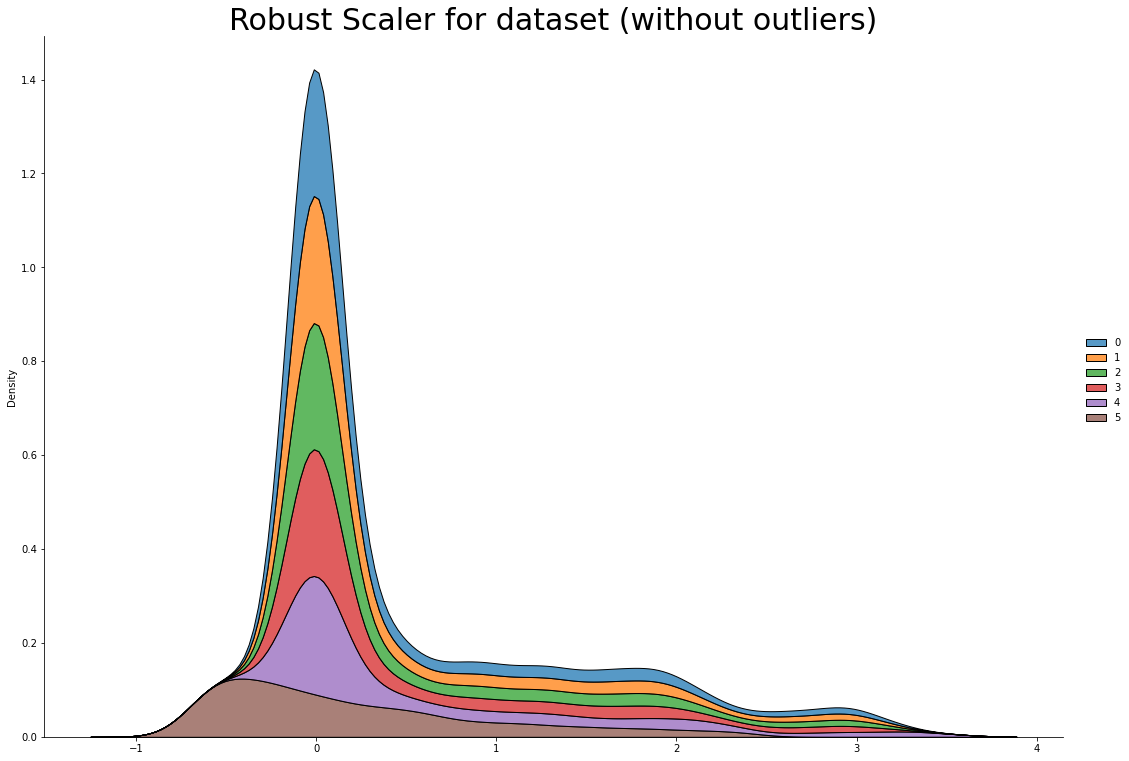

In [29]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df_cleaned)
Rscaler = scaler.transform(df_cleaned)
print(Rscaler)
sns.displot(Rscaler, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Robust Scaler for dataset (without outliers)", fontsize = 30)

Text(0.5, 1.0, 'Data Normalization for dataset (without outliers)')

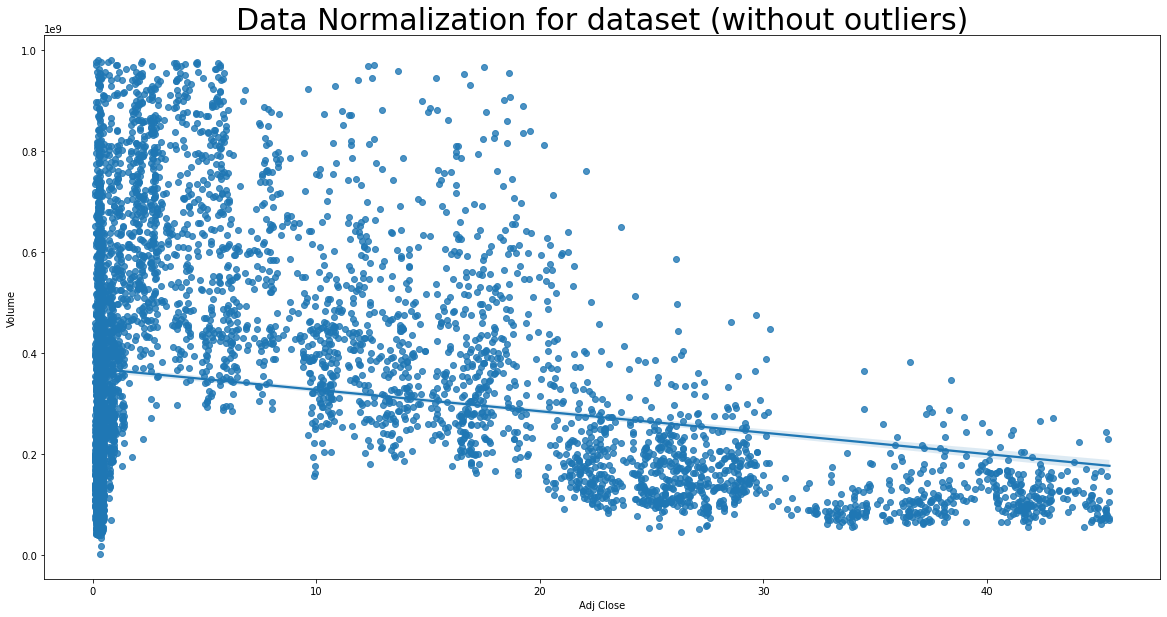

In [30]:
plt.figure(figsize=(20,10))
ax = sns.regplot(x="Adj Close", y="Volume", data=df_cleaned)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

Function for Model Evaluation


In [31]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

Pre Processing, defining Train and Test
Also checking dimension

In [32]:
X = ff_dataset.drop('Open', axis = 1)
y = ff_dataset['Open']
X.shape

(8042, 6)

In [33]:
y.shape

(8042,)

In [34]:
#Train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape


(6433, 6)

In [36]:
y_train.shape

(6433,)

In [37]:
X_test.shape

(1609, 6)

In [38]:
y_test.shape

(1609,)

References

https://www.stackvidhya.com/how-to-add-header-to-pandas-dataframe/;
https://www.addoptics.nl/optics-explained/refractive-index/
https://analyticsindiamag.com/exploring-dataprep-a-python-library-for-data-preparation-eda/#:~:text=DataPrep%20is%20an%20open%2Dsource,solved%20and%20taken%20care%20of.
https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
https://dzone.com/articles/python-class-attributes-vs-instance-attributes#:~:text=A%20class%20attribute%20is%20a,.)%20%2C%20of%20the%20class.
https://machinelearningmastery.com/difference-test-validation-datasets/
https://stringfixer.com/pt/Training_data
https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
https://baipureddyneeraj.medium.com/glass-classification-using-various-machine-learning-techniques-cf268fd520d6
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html
https://community.developers.refinitiv.com/questions/71300/python-time-series-convert-date-index-to-pandas-co.html
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
https://moonbooks.org/Articles/How-to-increase-the-size-of-the-cells-text-annotations-of-a-seaborn-heatmap-in-python-/
https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://deepnote.com/@econdesousa/ViolinPlotvsBoxPlot-aadf0c53-53b4-4221-89b9-4388c54c68bd
https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
https://seaborn.pydata.org/tutorial/distributions.html
https://seaborn.pydata.org/tutorial/relational.html